# Research on Borrower Reliability

The research is commissioned by the bank's credit department. The goal of the study is to determine whether marital status and the number of children of a client influence their ability to repay a loan on time. The input data provided by the bank includes statistics on the creditworthiness of clients. (The results of the research will be taken into account when developing a credit scoring model, a special system that evaluates the potential borrower's ability to repay a loan to the bank.)

**Research Objective:** determining risk factors for borrowers' default on loan repayment within the established term

**Research Tasks:**

- Assess the suitability of the initial data for further analysis and conduct data preprocessing.
- Perform data categorization.
- Determine the presence of a correlation between loan default and other client characteristics.
- Formulate risk factors for borrowers' default on loan repayment within the established term.

**Data Description:**
- children - number of children in the family;
- days_employed - total days of employment;
- dob_years - client's age in years;
- education - client's education level;
- education_id - education level identifier;
- family_status - client's marital status;
- family_status_id - marital status identifier;
- gender - client's gender;
- income_type - type of employment;
- debt - whether the client had a debt on repayment of loans;
- total_income - monthly income;
- purpose - purpose of taking the loan.

## Summary of the Analysis Results

Based on the categorical data analysis, it can be concluded that the additional risk factors for defaulting on a loan within the specified period are:

- Having children;
- Belonging to categories "single" (не женат/не замужем), "in a civil marriage" (состоит в гражданском браке);
- Stating "car-related operations" or "education expenses" as the purpose of the loan;
- Annual income level in the range of 50001–200000.

## Data Overview

Importing the necessary libraries for data analysis:

In [1]:
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt

Reading the file `data.csv` with the data (the path to the data is stored in a JSON file) and saving it in the variable `data`:

In [2]:
# Reading of JSON file
with open('config.json', 'r', encoding='utf-8') as f:
    config = json.load(f)

# Reading the CSV file using the path from the JSON file
dataset_path = config['dataset_path_bank']
data = pd.read_csv(dataset_path)

Removing the restrictions on displaying the number of columns, rows, and column width.

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Displaying the first 10 rows of the dataframe `data` on the screen.

In [4]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Displaying the main information about the data frame using the `info()` method.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In the original dataframe, there are 21,525 rows of information about bank clients. However, not all clients have data specified for total days employed (days_employed) and monthly income (total_income).

## Data Preprocessing

### Processing of Anomalous Values

It is worth noting that the dataset contains negative values in the `days_employed` column, which is an anomalous value. We will process the values in this column by replacing all negative values with positive ones using the `abs()` method:

In [6]:
data['days_employed'] = data['days_employed'].abs()

For each type of employment, let's display the median value of `days_employed` in days:

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

Translating the `income_type` column values in English:

In [8]:
# Creating a dictionary with Russian to English translations for the income types
translations = {
    'безработный': 'unemployed',
    'в декрете': 'on maternity leave',
    'госслужащий': 'civil servant',
    'компаньон': 'business partner',
    'пенсионер': 'pensioner',
    'предприниматель': 'entrepreneur',
    'сотрудник': 'employee',
    'студент': 'student'
}

# Applying the translation to the 'income_type' column
data['income_type'] = data['income_type'].map(translations)

Two types (unemployed and pensioners) have abnormally large values. It is impossible to correct such values based on the available data, so we will leave them as they are. However, it is important to draw the customer's attention to the presence of such anomalies in the original data.

Displaying the list of unique values in the `children` column:

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In the `children` column, there are two anomalous values. Removing the rows containing these anomalous values from the `data` dataframe:

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Displaying the list of unique values in the `children` column once again to ensure that the anomalies have been removed:

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Removing Missing Values

Displaying the number of missing values for each column:

In [12]:
data.isna().sum()

children               0
days_employed       2162
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2162
purpose                0
dtype: int64

There are missing values in two columns. One of them is `days_employed`. The other column with missing values is `total_income`, which stores income data. Income type has the strongest influence on the total income amount, so the missing values in this column can be filled with the median value for each income type from the `income_type` column.

In [13]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

We'll also fill in the missing values in the `days_employed` column with the median values for each income type from the `income_type` column.

In [14]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Making sure that all missing values have been filled in:

In [15]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Data Type Conversion

Changing the data type of the `total_income` column from float to integer using the `astype()` method.

In [16]:
data['total_income'] = data['total_income'].astype(int)

### Duplicates Handling

Handling implicit duplicates in the `education` column. This column contains the same values but written differently, using uppercase and lowercase letters.

In [17]:
data['education'] = data['education'].str.lower()

Displaying the number of duplicate rows in the data:

In [18]:
data.duplicated().sum()

71

Removal of explicit duplicates:

In [19]:
data = data.drop_duplicates()

### Data Categorization

Based on the ranges provided below, let's create a column named `total_income_category` in the dataframe `data` with the following categories:

- 0-30 000 - E;
- 30 001-50 000 - D;
- 50 001-200 000 - C;
- 200 001-1 000 000 - B;
- 1 000 001 and more - A.

In [20]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [21]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Displaying the list of unique purposes for taking a loan from the column `purpose`:

In [22]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Creating a function that will generate a new column `purpose_category` based on the data from the `purpose` column. The categories in this new column will include the following:

- car-related operations;
- real estate operations;
- wedding expenses;
- education expenses.

In [23]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'car-related operations'
        elif 'жил' in row or 'недвиж' in row:
            return 'real estate operations'
        elif 'свад' in row:
            return 'wedding expenses'
        elif 'образов' in row:
            return 'education expenses'
    except:
        return 'no category'

In [24]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Data Analysis

### Dependency between the Number of Children and Loan Repayment on Time

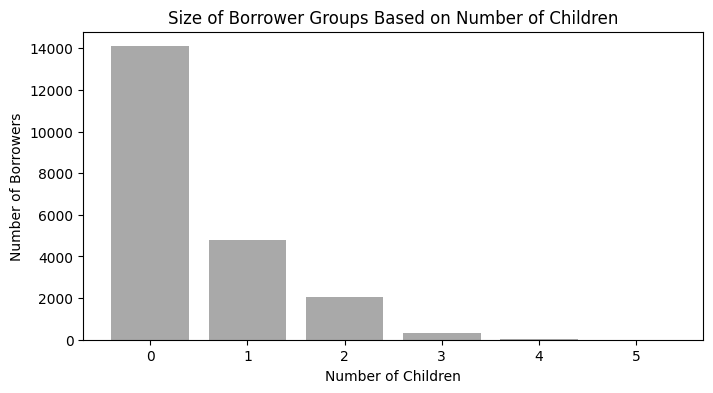

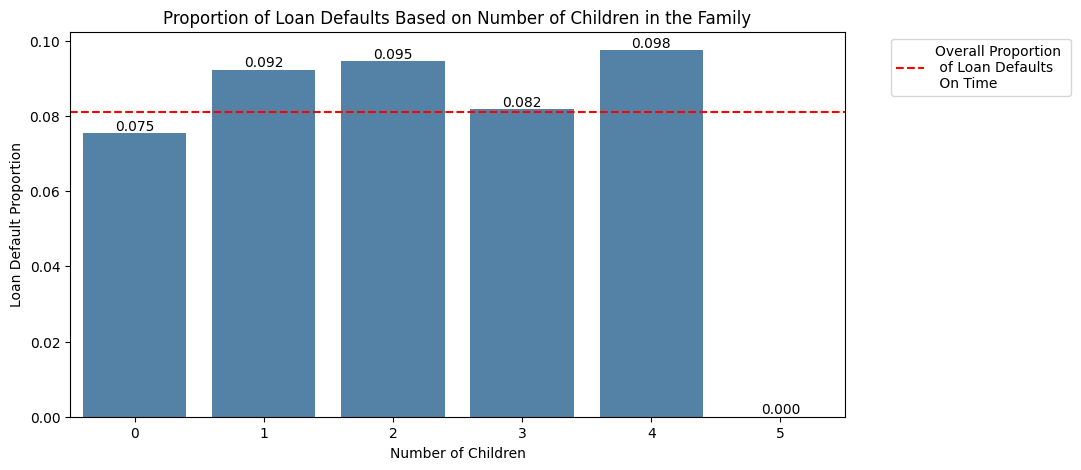

In [25]:
# Displaying the size of borrower groups based on the number of children
# Grouping the data by the number of children and counting the borrowers
children_count = data.groupby('children')['children'].count()

# Creating a bar chart
plt.figure(figsize=(8, 4))
plt.bar(children_count.index, children_count.values, color='darkgrey')
plt.xlabel('Number of Children')
plt.ylabel('Number of Borrowers')
plt.title('Size of Borrower Groups Based on Number of Children')
plt.xticks(rotation=0)

# Displaying the chart
plt.show()
print()

# Determining the overall proportion of borrowers who don't repay loans on time
debt_rate_total = data.loc[data['debt'] == 1]['debt'].count() / data['debt'].count()

# Grouping the data by the number of children in families 
# and determining the proportion of loan defaults based on the number of children
dept_child_dependance = data.groupby('children')['debt'].mean()

# Visualizing the results
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=sorted(data['children'].unique()), y=dept_child_dependance, color='steelblue')
ax.set_title('Proportion of Loan Defaults Based on Number of Children in the Family')
ax.set_xlabel('Number of Children')
ax.set_ylabel('Loan Default Proportion')

# Adding a dashed line showing the overall loan default rate
ax.axhline(debt_rate_total, 
           color='red', 
           linestyle='--', 
           label='Overall Proportion \n of Loan Defaults \n On Time')

# Adding a legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the loan default rate data on the chart
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{height:.3f}', 
            ha='center', 
            va='bottom')

# Displaying the chart
plt.show()

**Conclusion:** Since the absolute number of families with 4 or 5 children is significantly lower than the sizes of the groups in the rest of the sample, this data will not be considered in further assessing the dependency. However, looking at the results for the remaining groups, it can be concluded that there is a dependency, albeit nonlinear, between the number of children in a family and loan repayment on time. Specifically, for all families without children, the default rate on loans is lower than the corresponding value for the entire dataset, whereas for families with one, two, and three children, this rate exceeds the overall rate.

### Dependency between Marital Status and Timely Loan Repayment

Translating the `family_status` column values in English:

In [26]:
# Creating a dictionary with Russian to English translations for the marital status
translations = {
    'Не женат / не замужем': 'single',
    'в разводе': 'divorced',
    'вдовец / вдова': 'widowed',
    'гражданский брак': 'civil partnership',
    'женат / замужем': 'married'
}

# Applying the translation to the 'family_status' column
data['family_status'] = data['family_status'].map(translations)

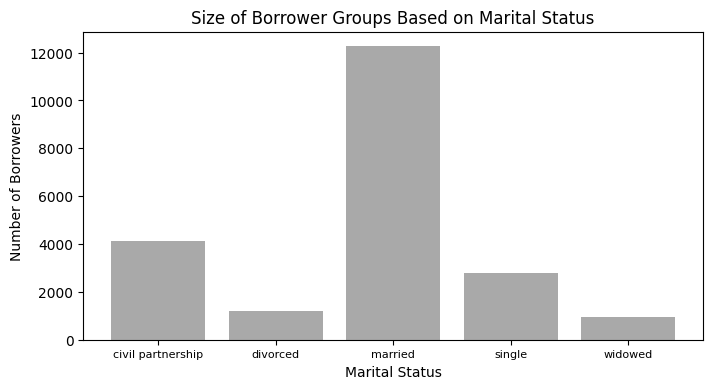

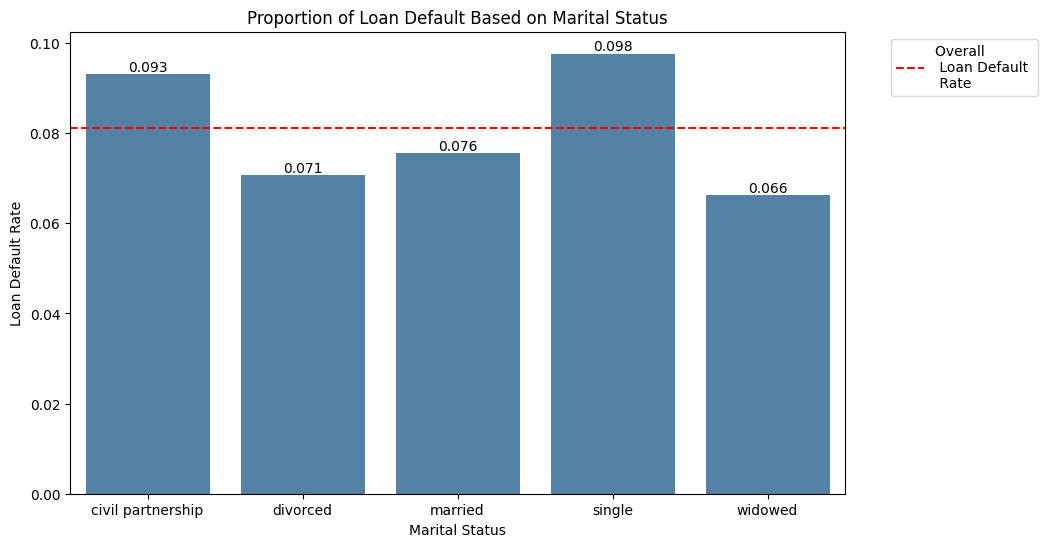

In [27]:
# Displaying the size of borrower groups based on marital status
# Grouping the data by marital status and counting the number of borrowers
family_status_count = data.groupby('family_status')['family_status'].count()

# Creating a bar chart
plt.figure(figsize=(8, 4))
plt.bar(family_status_count.index, family_status_count.values, color='darkgrey')
plt.xlabel('Marital Status')
plt.ylabel('Number of Borrowers')
plt.title('Size of Borrower Groups Based on Marital Status')
plt.xticks(rotation=0, fontsize=8)  

# Displaying the chart
plt.show()
print()

# Determining the overall proportion of people who do not repay loans on time
debt_rate_total = data.loc[data['debt'] == 1]['debt'].count() / data['debt'].count()

# Grouping the data by the 'family_status' column and determining the proportion of loan default
# based on marital status
dept_marriage_dependance = data.groupby('family_status')['debt'].mean()

# Visualizing the results
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sorted(data['family_status'].unique()), y=dept_marriage_dependance, color='steelblue')
ax.set_title('Proportion of Loan Default Based on Marital Status')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Loan Default Rate')

# Adding a dashed line showing the overall loan default rate
ax.axhline(debt_rate_total, 
           color='red', 
           linestyle='--', 
           label='Overall \n Loan Default \n Rate')

# Adding a legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the loan default rate data on the chart
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{height:.3f}', 
            ha='center', 
            va='bottom')
 
# Showing the chart
plt.show()

**Conclusion:** Since the borrower groups with the marital statuses "widowed" and "divorced" are relatively small, we suggest excluding their results from the analysis conclusions. Overall, there is a relationship between marital status and loan repayment. According to the calculations, more often than the overall data set, debt occurs among singles and those in civil partnerships, while married individuals are more likely to repay their loans on time compared to others.

### Dependency between Income Level and Timely Loan Repayment

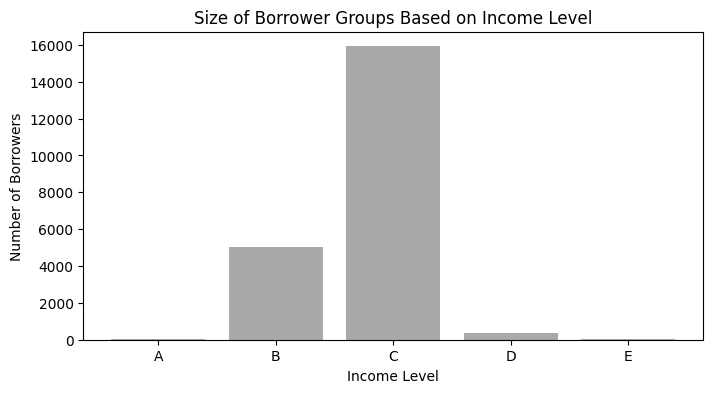

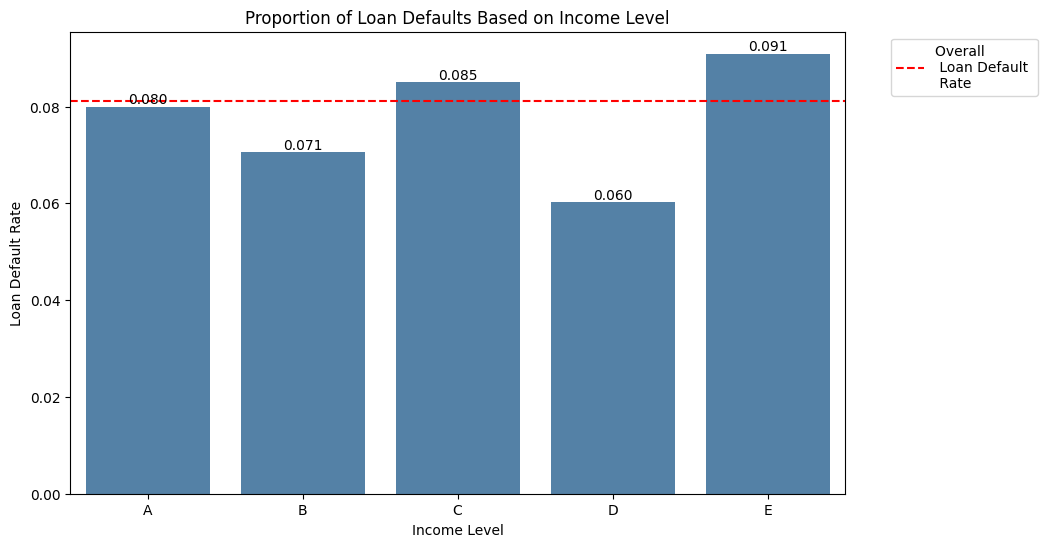

In [28]:
# Displaying the size of borrower groups based on income level
# Grouping the data by income level and counting the number of borrowers
income_count = data.groupby('total_income_category')['total_income_category'].count()

# Creating a bar chart
plt.figure(figsize=(8, 4))
plt.bar(income_count.index, income_count.values, color='darkgrey')
plt.xlabel('Income Level')
plt.ylabel('Number of Borrowers')
plt.title('Size of Borrower Groups Based on Income Level')
plt.xticks(rotation=0)

# Displaying the chart
plt.show()
print()

# Determining the overall percentage of borrowers who do not repay loans on time
debt_rate_total = data.loc[data['debt'] == 1]['debt'].count() / data['debt'].count()

# Grouping the data by total_income_category and determining the percentage
# of loan repayment defaults based on income level
dept_income_dependance = data.groupby('total_income_category')['debt'].mean()

# Visualizing the results
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sorted(data['total_income_category'].unique()), y=dept_income_dependance, color='steelblue')
ax.set_title('Proportion of Loan Defaults Based on Income Level')
ax.set_xlabel('Income Level')
ax.set_ylabel('Loan Default Rate')

# Adding a dashed line showing the overall loan repayment default rate
ax.axhline(debt_rate_total, 
           color='red', 
           linestyle='--', 
           label='Overall \n Loan Default \n Rate')

# Adding a legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the loan repayment default rate data on the chart
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{height:.3f}', 
            ha='center', 
            va='bottom')

# Displaying the chart
plt.show()

0–30 000 — 'E';
30 001–50 000 — 'D';
50 001–200 000 — 'C';
200 001–1 000 000 — 'B';
1 000 001 and more — 'A'.

In [29]:
# Determining the composition of Group D based on employment type
D_category = data.loc[data['total_income_category'] == 'D']
D_category_grouped = D_category.groupby('income_type')['income_type'].count()
D_category_grouped

income_type
business partner     25
civil servant        24
employee            136
pensioner           164
Name: income_type, dtype: int64

**Conclusion:** Taking into account the relatively small size of groups A and E and excluding the results of these groups from the analysis, we can conclude that there is a correlation between income level and timely loan repayment. The highest level of discipline in loan repayment is observed in the small group D, which is almost half composed of borrowers in the "pensioner" category, as well as in group B, whose borrowers have relatively high income. Meanwhile, the indicator for the most numerous group C exceeds the overall proportion of loan defaults for the entire dataset.

### Impact of Loan Purposes on Timely Repayment

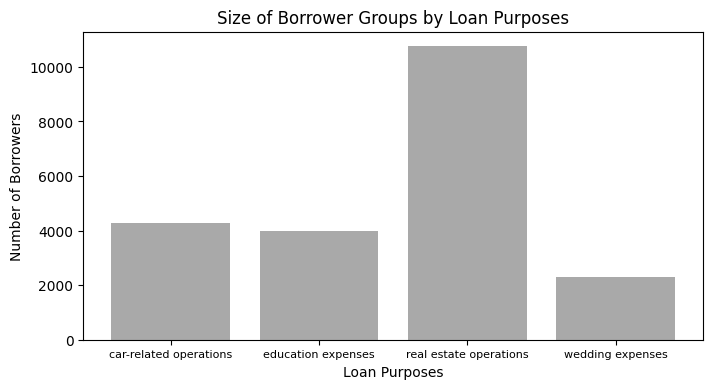

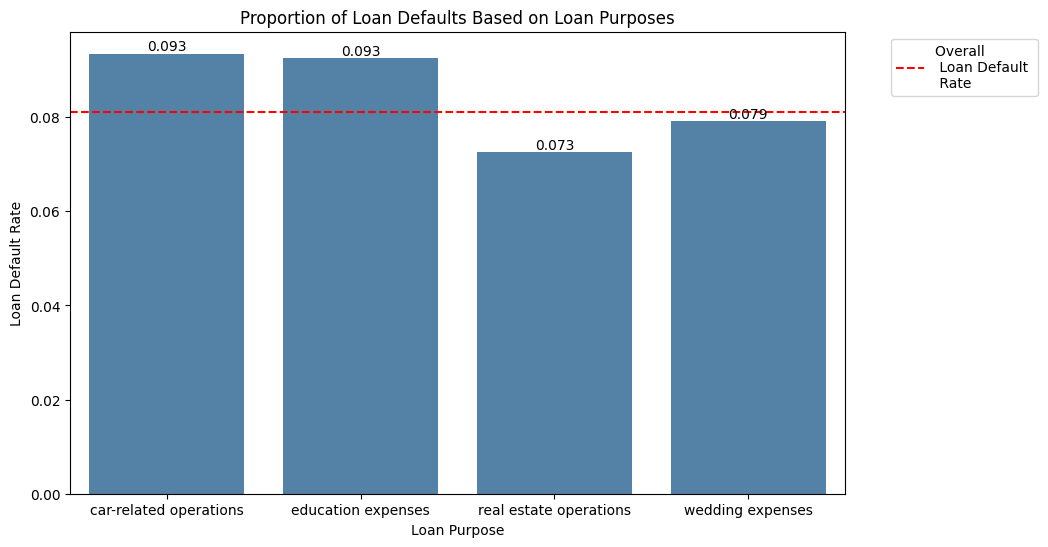

In [30]:
# Display the size of borrower groups based on loan purposes
# Group the data by loan purposes and count the number of borrowers
purpose_count = data.groupby('purpose_category')['purpose_category'].count()

# Create a bar chart
plt.figure(figsize=(8, 4))
plt.bar(purpose_count.index, purpose_count.values, color='darkgrey')
plt.xlabel('Loan Purposes')
plt.ylabel('Number of Borrowers')
plt.title('Size of Borrower Groups by Loan Purposes')
plt.xticks(rotation=0, fontsize=8)  

# Display the chart
plt.show()
print()

# Determine the overall proportion of borrowers who do not repay loans on time
debt_rate_total = data.loc[data['debt'] == 1]['debt'].count()/data['debt'].count()

# Group the data by purpose_category column value and calculate the proportion of
# loan defaults based on loan purposes
dept_purpose_dependance = data.groupby('purpose_category')['debt'].mean()

# Visualize the results
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sorted(data['purpose_category'].unique()), y=dept_purpose_dependance, color='steelblue')
ax.set_title('Proportion of Loan Defaults Based on Loan Purposes')
ax.set_xlabel('Loan Purpose')
ax.set_ylabel('Loan Default Rate')

# Add a dashed line showing the overall proportion of loan defaults
ax.axhline(debt_rate_total, 
           color='red', 
           linestyle='--', 
           label='Overall \n Loan Default \n Rate')

# Add a legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the loan default data on the chart
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{height:.3f}', 
            ha='center', 
            va='bottom')
 
# Show the chart
plt.show()

**Conclusion:** The purpose of the loan has an impact on timely repayment. According to the research, borrowers who use funds for "real estate operations" (the most numerous category) and for "wedding expenses" (the least numerous category) are more likely to repay the borrowed funds on time compared to those whose purpose is "car-related operations" or "education expenses".

### Dependency Between Number of Loans and Number of Children

To display changes by categories, we will use a line graph. Let's group the data beforehand and create the necessary table.

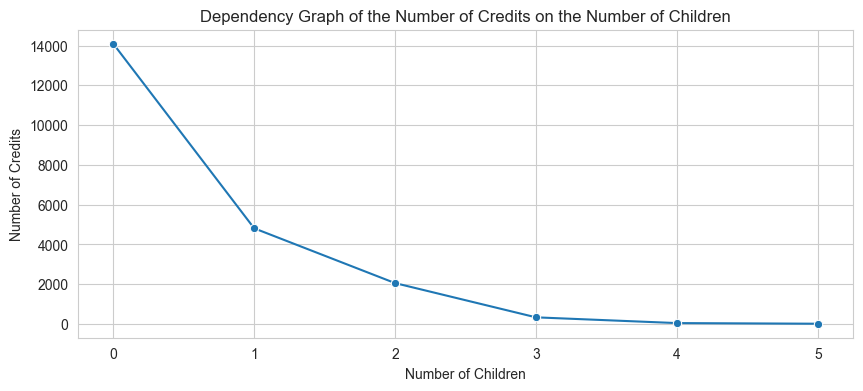

In [31]:
# Preparing data for counting credits depending on the number of children
data_ch = data.groupby('children')[['children']].count()

# Applying the whitegrid style from the seaborn library
sns.set_style('whitegrid')

# Setting the size of the plot
plt.figure(figsize=(10, 4))

# Plotting a line graph using seaborn
sns.lineplot(x=data_ch.index, y='children', data=data_ch, marker='o')

# Setting the title and axis labels using matplotlib
plt.title('Dependency Graph of the Number of Credits on the Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Credits')

# Displaying the graph
plt.show()

**Conclusion:** The number of issued credits decreases depending on the number of children in the borrower's family. This may not be because families with many children take out loans less frequently, but because the number of families without children or with 1-2 children is much larger than the number of large families.

### Dependency between Income and Education

Translating the `education` column values in English:

In [32]:
# Creating a dictionary with Russian to English translations for the education level terms
translations = {
    'высшее': 'higher',
    'неоконченное высшее': 'unfinished higher',
    'среднее': 'secondary',
    'начальное': 'primary',
    'ученая степень': 'academic degree'
}

# Applying the translation to the 'family_status' column
data['education'] = data['education'].map(translations)

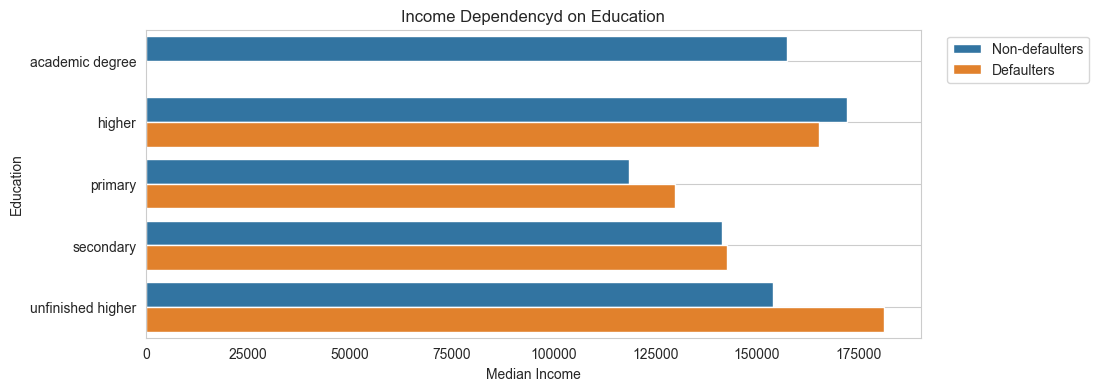

In [33]:
# Grouping data by education and debt, calculating the median income
data_ed = data.groupby(['education', 'debt'], as_index=False)[['total_income']].median()

# Setting the size of the plot
plt.figure(figsize=(10, 4))

# Defining colors for the bars
colors = ['#1f77b4', '#ff7f0e']

# Creating a bar plot using seaborn
sns.barplot(x='total_income', y='education', data=data_ed, hue='debt', palette=colors)

# Setting the plot title and axis labels using matplotlib
plt.title('Income Dependencyd on Education')
plt.xlabel('Median Income')
plt.ylabel('Education')

# Get the legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Create and customize the legend
plt.legend(handles=handles, labels=['Non-defaulters', 'Defaulters'], bbox_to_anchor=(1.025, 1), loc='upper left')

# Adding grid lines
plt.grid()

# Displaying the plot
plt.show()

**Conclusion:** Both individuals with higher education and those with primary education can be debtors. However, among people with an academic degree, there are no debtors at all.

## Research Results

During the research, missing values and critical errors in the data were removed, and additional columns were added to the original table to facilitate easy grouping of data based on significant categories of borrower income level and loan purposes.

Based on the categorical data analysis, it can be concluded that the bank, when granting loans to new borrowers, needs to consider the following additional risk factors:

- The borrower having children.
- Borrowers categorized as "single", in a "civil partnership", are at a higher risk.
- Borrowers who specify "car-related operations" or "education expenses" as the loan purpose are also at risk.
- An annual income level ranging from 50001 to 200000 is associated with higher risks.
  
Additionally, it is noteworthy that the number of loans granted decreases with the number of children in the borrower's family. Regarding education level, only borrowers with an academic degree do not fall into the category of defaulters.